In [223]:
import pandas as pd
import numpy as np
import csv
kidnapping = pd.read_csv('sf-incidents.csv', encoding='utf-8')
kidnapping.head(3)

,Dates,Category,Descript,PdDistrict,Resolution,Address,X,Y,Month,Day,Hour,Minute,Year,WeekDay
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5,13,23,53,2015,Wednesday
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5,13,23,53,2015,Wednesday
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,5,13,23,33,2015,Wednesday


In [224]:
# unique presence of known values
kidnapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
Dates         150000 non-null object
Category      150000 non-null object
Descript      150000 non-null object
PdDistrict    150000 non-null object
Resolution    150000 non-null object
Address       150000 non-null object
X             150000 non-null float64
Y             150000 non-null float64
Month         150000 non-null int64
Day           150000 non-null int64
Hour          150000 non-null int64
Minute        150000 non-null int64
Year          150000 non-null int64
WeekDay       150000 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 16.0+ MB


In [225]:
# check NaN
kidnapping.isnull().values.any()

False

In [226]:
# categorical variables from the "Category" column
np.unique(kidnapping.Category.values)

array(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
       'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
       'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
       'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
       'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE',
       'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
       'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
       'WARRANTS', 'WEAPON LAWS'], dtype=object)

In [227]:
kidnapping['Kidnapped']=(kidnapping.Category == 'KIDNAPPING')

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# with label encoding, Kidnnaped column get 1 in value when "Category"='Kidnapped', failing 0
kidnapping['Kidnapped'] = label_encoder.fit_transform(kidnapping['Kidnapped'])
kidnapping.head(5)

,Dates,Category,Descript,PdDistrict,Resolution,Address,X,Y,Month,Day,Hour,Minute,Year,WeekDay,Kidnapped
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5,13,23,53,2015,Wednesday,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5,13,23,53,2015,Wednesday,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,5,13,23,33,2015,Wednesday,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,5,13,23,30,2015,Wednesday,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,5,13,23,30,2015,Wednesday,0


In [228]:
# verification of the affirmation of the previous comment
kidnapping[kidnapping.Category == 'KIDNAPPING'].head(5)

,Dates,Category,Descript,PdDistrict,Resolution,Address,X,Y,Month,Day,Hour,Minute,Year,WeekDay,Kidnapped
242,2015-05-13 12:21:00,KIDNAPPING,FALSE IMPRISONMENT,INGLESIDE,"ARREST, BOOKED",1500 Block of DOLORES ST,-122.424348,37.745046,5,13,12,21,2015,Wednesday,1
328,2015-05-13 04:45:00,KIDNAPPING,KIDNAPPING DURING ROBBERY,SOUTHERN,NONE,1500 Block of MARKET ST,-122.419667,37.774682,5,13,4,45,2015,Wednesday,1
374,2015-05-12 22:25:00,KIDNAPPING,FALSE IMPRISONMENT,CENTRAL,"ARREST, BOOKED",200 Block of KEARNY ST,-122.403916,37.790539,5,12,22,25,2015,Tuesday,1
875,2015-05-11 16:00:00,KIDNAPPING,CHILD STEALING,INGLESIDE,NONE,100 Block of STONERIDGE LN,-122.426222,37.710019,5,11,16,0,2015,Monday,1
1060,2015-05-11 07:30:00,KIDNAPPING,FALSE IMPRISONMENT,NORTHERN,NONE,1200 Block of SUTTER ST,-122.420942,37.787596,5,11,7,30,2015,Monday,1


In [229]:
import matplotlib.pyplot as plt
#%matplotlib inline

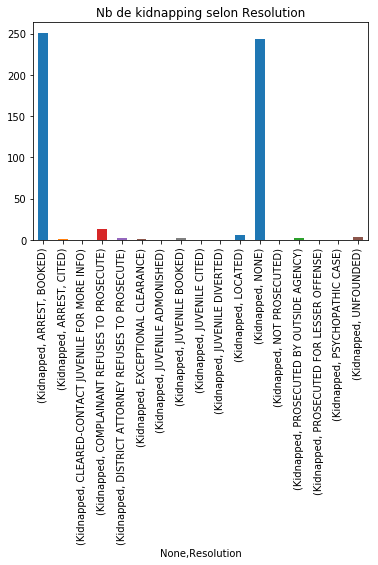

In [230]:
df1 = kidnapping.groupby(['Resolution']).agg({'Kidnapped':'sum'})
df1.unstack().plot(kind='bar', stacked=1, title='Nb de kidnapping selon Resolution')
#plt.xticks(rotation=85, fontsize=9)

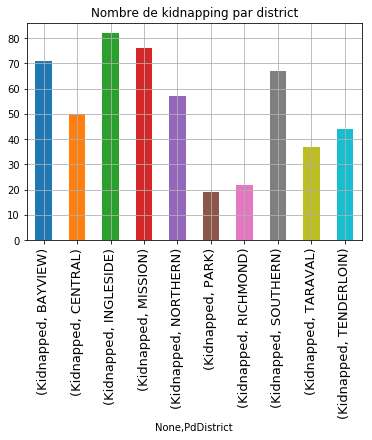

In [231]:
df2 = kidnapping.groupby(['PdDistrict']).agg({'Kidnapped':'sum'})
df2.unstack().plot(kind='bar', stacked=1, title='Nombre de kidnapping par district')
plt.xticks(fontsize=13)
plt.grid()

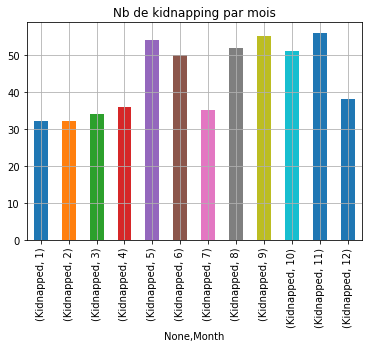

In [232]:
df3 = kidnapping.groupby(['Month']).agg({'Kidnapped':'sum'})
df3.unstack().plot(kind='bar', stacked=1, title='Nb de kidnapping par mois')
plt.grid()

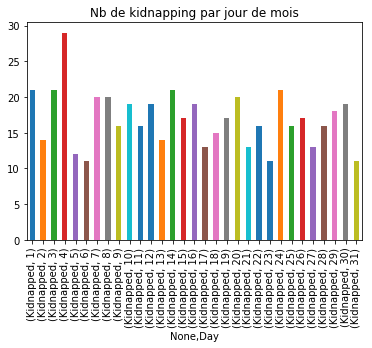

In [233]:
df4 = kidnapping.groupby(['Day']).agg({'Kidnapped':'sum'})
df4.unstack().plot(kind='bar', stacked=1, title='Nb de kidnapping par jour de mois')

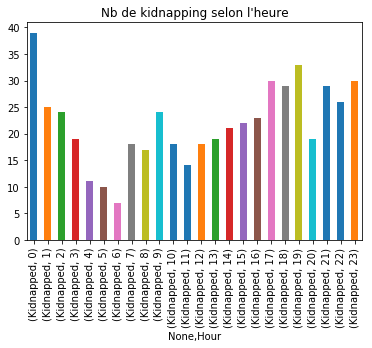

In [234]:
df5 = kidnapping.groupby(['Hour']).agg({'Kidnapped':'sum'})
df5.unstack().plot(kind='bar', stacked=1, title='Nb de kidnapping selon l\'heure')

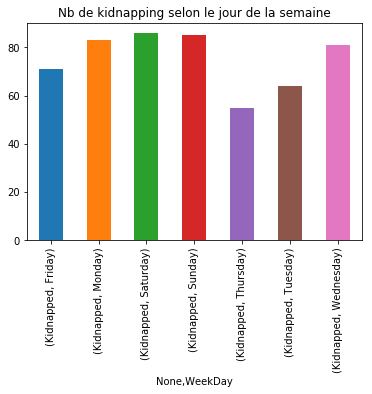

In [235]:
df5 = kidnapping.groupby(['WeekDay']).agg({'Kidnapped':'sum'})
df5.unstack().plot(kind='bar', stacked=1, sort_columns=False, title='Nb de kidnapping selon le jour de la semaine')

# TODO: sort columns in week day order

The attributes that appear to be most relevant for explaining kidnapping are the district and the time because this is where the most important invariability occurs.

In [236]:
import math

def difference(l1,l2):
   return [l2[l1.index(i)]-i for i in l1]
def puissance(l,n):
   return [pow(i,n) for i in l]
def distance_euclidienne(l1,l2):
    return math.sqrt(sum(puissance(difference(l1,l2),2)))

In [237]:
kidnapping.columns

Index(['Dates', 'Category', 'Descript', 'PdDistrict', 'Resolution', 'Address',
       'X', 'Y', 'Month', 'Day', 'Hour', 'Minute', 'Year', 'WeekDay',
       'Kidnapped'],
      dtype='object')

In [238]:
# display euclidean distances for each row
kidnapping['distance']=0

#for i in range(0,len(kidnapping['X'])):
#   print(distance_euclidienne([kidnapping['X'][i],kidnapping['Y'][i]],[-122.423,36.768]))

In [239]:
# dataset splitting: 2/3 allocated to training and 1/3 to testing

train=kidnapping[:100000]
test=kidnapping[100000:]

In [240]:
from sklearn import linear_model

label_encoder = preprocessing.LabelEncoder()
log_model1 = linear_model.LogisticRegression()

In [241]:
pd.options.mode.chained_assignment = None # avoid the SettingWithCopyWarning
train['encoded_district'] = label_encoder.fit_transform(train['PdDistrict'])

In [242]:
log_model1.fit(X = train[['Hour', 'encoded_district']], y = train['Kidnapped'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [243]:
log_model1.score(X = train[['Hour', 'encoded_district']], y = train['Kidnapped'])

0.9967

In [244]:
pd.options.mode.chained_assignment = None # avoid the SettingWithCopyWarning
test['encoded_district'] = label_encoder.fit_transform(test['PdDistrict'])

In [245]:
log_model1.score(X = test[['Hour', 'encoded_district']], y = test['Kidnapped'])

0.9961

Because we start observing difference @ 10^-4 between train and test result, the gap is thin. Hence, the time and district seems to be quite good elements to integrate in this model.

In [246]:
from sklearn.ensemble import RandomForestClassifier

In [247]:
forest1 = RandomForestClassifier(n_estimators = 100)
forest1.fit(X = train[['Hour', 'encoded_district']], y = train['Kidnapped'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [248]:
print("Random Forrest score on train: " + str(forest1.score(X = train[['Hour', 'encoded_district']], y = train['Kidnapped'])))

Random Forrest score on train: 0.9967


In [249]:
print("Random Forrest score on test: "+str(forest1.score(X = test[['Hour', 'encoded_district']], y = test['Kidnapped'])))

Random Forrest score on test: 0.9961


We see using the two different models that they have the same score on the test part, the two models are therefore equally effective. According to both methods, the time and the district can predict a kidnapping in the same way.